# SURE TOMORROW. Insurance analysis

## Contenido <a id='back'></a>


* [Introducción](#intro) 
* [1. Preprocesamiento de datos](#data_preprocessing)
* [2. EDA](#eda)
* [3. Tarea 1](#first_task)
* [4. Tarea 2](#second_task)
* [5. Tarea 3](#third_task)
* [6. Tarea 4](#fourth_task)
* [Conclusiones](#end)

## Introducción <a id='intro'></a>

La compañía de seguros Sure Tomorrow quiere resolver varias tareas con la ayuda de machine learnig y diseñar un modelo de predicción para evaluar diferentes tareas. 


## Objetivo

Resolver las siguientes tareas mediante modelación de machine llearning:

- Tarea 1: encontrar clientes que sean similares a un cliente determinado. Esto ayudará a los agentes de la compañía con el marketing.
- Tarea 2: predecir la probabilidad de que un nuevo cliente reciba una prestación del seguro. ¿Puede un modelo de predictivo funcionar mejor que un modelo dummy?
- Tarea 3: predecir el número de prestaciones de seguro que un nuevo cliente pueda recibir utilizando un modelo de regresión lineal.
- Tarea 4: proteger los datos personales de los clientes sin afectar al modelo del ejercicio anterior. Es necesario desarrollar un algoritmo de transformación de datos que dificulte la recuperación de la información personal si los datos caen en manos equivocadas. Esto se denomina enmascaramiento u ofuscación de datos. Pero los datos deben protegerse de tal manera que no se vea afectada la calidad de los modelos de machine learning. No es necesario elegir el mejor modelo, basta con demostrar que el algoritmo funciona correctamente.

[Regresar a contenido](#back)


## 1. Preprocesamiento de datos <a id='data_preprocessing'></a>

### Inicialización

In [1]:
pip install scikit-learn --upgrade

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
from sklearn.neighbors import NearestNeighbors
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.linear_model
import sklearn.metrics
import sklearn.neighbors
import sklearn.preprocessing
import math
from sklearn.model_selection import train_test_split

from IPython.display import display

## Carga de datos

Carga los datos y haz una revisión básica para comprobar que no hay problemas obvios.

In [3]:
df = pd.read_csv('insurance_us.csv')

Renombramos las columnas para que el código se vea más coherente con su estilo.

In [4]:
df = df.rename(columns={'Gender': 'gender', 'Age': 'age', 'Salary': 'income', 'Family members': 'family_members', 'Insurance benefits': 'insurance_benefits'})

In [5]:
df.sample(10)

,gender,age,income,family_members,insurance_benefits
4672,0,26.0,22600.0,1,0
1193,0,36.0,30000.0,3,0
4451,0,29.0,48200.0,3,0
4559,0,36.0,36300.0,2,0
1682,0,41.0,36100.0,1,0
3223,0,23.0,57500.0,3,0
2301,1,40.0,55500.0,0,0
582,1,25.0,54000.0,1,0
2729,0,37.0,48500.0,0,0
4832,1,30.0,34300.0,2,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   float64
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [7]:
# puede que queramos cambiar el tipo de edad (de float a int) aunque esto no es crucial

# escribe tu conversión aquí si lo deseas:

df['age']= df['age'].astype('int64')

df['age'].head()

0    41
1    46
2    29
3    21
4    28
Name: age, dtype: int64

In [8]:
# comprueba que la conversión se haya realizado con éxito

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   int64  
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 195.4 KB


In [9]:
# ahora echa un vistazo a las estadísticas descriptivas de los datos.# ¿Se ve todo bien?

df.describe()

,gender,age,income,family_members,insurance_benefits
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


En ete caso al aplicar el método describe(), podemos observar que la desviación estándar de en las columnas 'gender', 'age', 'family_members' e 'insurance_benefits' es de máximo 8.4 aproximadamente, lo cual nos indica que los datos de estas columnas están cerca de la media y no están tan dispersos. En el caso de la columna 'income', la desviación estándar es de  9900.1 lo cual nos indica que existe la probabilidad de que existan datos atípicos, los cuales pueden afectar en operaciones futuras.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   int64  
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 195.4 KB


In [11]:
def down_limit(data):
    q1=data.quantile(0.25)
    q3=data.quantile(0.75)
    iqr= q3-q1
    down= q1-(1.5*iqr)
    return down
    
def up_limit(data):
    q1=data.quantile(0.25)
    q3=data.quantile(0.75)
    iqr= q3-q1
    up= q3+(1.5*iqr)
    return up   

df= df[
    (down_limit(df['income']) <= df['income'])
    &(df['income'] <= up_limit(df['income']))
]

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4963 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              4963 non-null   int64  
 1   age                 4963 non-null   int64  
 2   income              4963 non-null   float64
 3   family_members      4963 non-null   int64  
 4   insurance_benefits  4963 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 232.6 KB


In [12]:
df

,gender,age,income,family_members,insurance_benefits
0,1,41,49600.0,1,0
1,0,46,38000.0,1,1
2,0,29,21000.0,0,0
3,0,21,41700.0,2,0
4,1,28,26100.0,0,0
...,...,...,...,...,...
4995,0,28,35700.0,2,0
4996,0,34,52400.0,1,0
4997,0,20,33900.0,2,0
4998,1,22,32700.0,3,0


In [13]:
df.describe()

,gender,age,income,family_members,insurance_benefits
count,4963.000000,4963.000000,4963.000000,4963.000000,4963.000000
mean,0.498489,30.944187,39929.619182,1.194036,0.148096
std,0.500048,8.446664,9594.340604,1.091367,0.463533
min,0.000000,18.000000,13400.000000,0.000000,0.000000
25%,0.000000,24.000000,33400.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,66300.000000,6.000000,5.000000


Se intentó realizar la eliminaciónd e los datos outliers, sin embargo, no hay mucho cambio tanto en la desviación estandar ni en los valores mínimo y máximo utilizando el método describe(), por lo que se considera se dejaran los mismos datos originalesb.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4963 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              4963 non-null   int64  
 1   age                 4963 non-null   int64  
 2   income              4963 non-null   float64
 3   family_members      4963 non-null   int64  
 4   insurance_benefits  4963 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 232.6 KB


In [15]:
df= df.reset_index(drop=True)
df

,gender,age,income,family_members,insurance_benefits
0,1,41,49600.0,1,0
1,0,46,38000.0,1,1
2,0,29,21000.0,0,0
3,0,21,41700.0,2,0
4,1,28,26100.0,0,0
...,...,...,...,...,...
4958,0,28,35700.0,2,0
4959,0,34,52400.0,1,0
4960,0,20,33900.0,2,0
4961,1,22,32700.0,3,0


[Regresar a contenido](#back)

## 2. EDA <a id='eda'></a>

Vamos a comprobar rápidamente si existen determinados grupos de clientes observando el gráfico de pares.

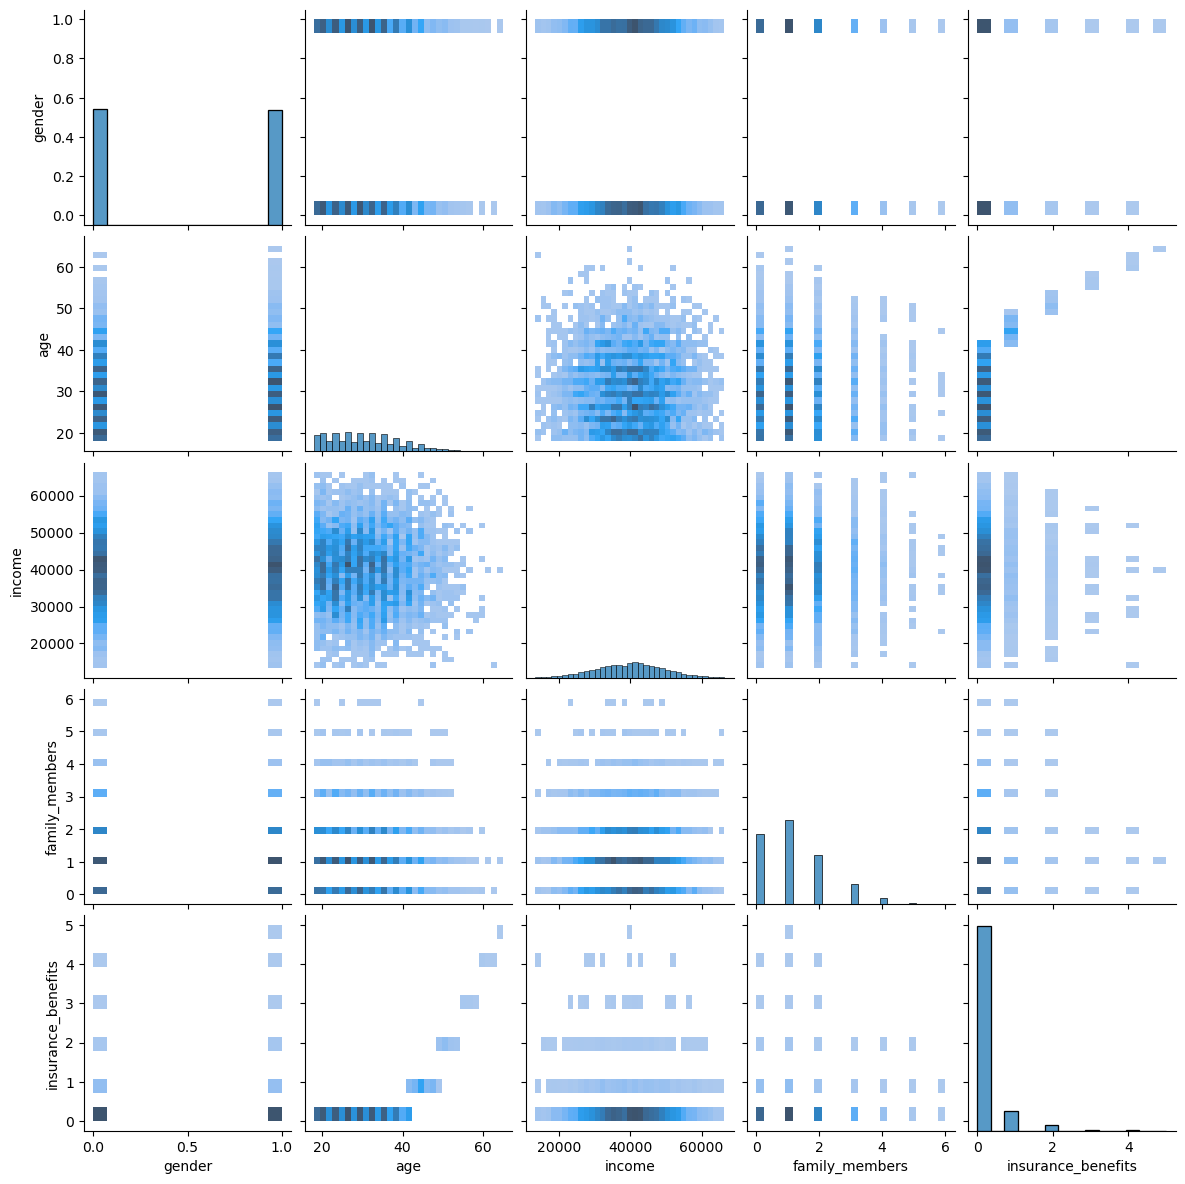

In [16]:
g = sns.pairplot(df, kind='hist')
g.fig.set_size_inches(12, 12)

De acuerdo, es un poco complicado detectar grupos obvios (clústeres) ya que es difícil combinar diversas variables simultáneamente (para analizar distribuciones multivariadas). Ahí es donde LA y ML pueden ser bastante útiles.

[Regresar a contenido](#back)

# 3. Tarea 1: Clientes similares <a id='first_task'></a>

En el lenguaje de ML, es necesario desarrollar un procedimiento que devuelva los k vecinos más cercanos (objetos) para un objeto dado basándose en la distancia entre los objetos.
Es posible que quieras revisar las siguientes lecciones (capítulo -> lección)- Distancia entre vectores -> Distancia euclidiana
- Distancia entre vectores -> Distancia Manhattan

Para resolver la tarea, podemos probar diferentes métricas de distancia.

Escribe una función que devuelva los k vecinos más cercanos para un $n^{th}$ objeto basándose en una métrica de distancia especificada. A la hora de realizar esta tarea no debe tenerse en cuenta el número de prestaciones de seguro recibidas.
Puedes utilizar una implementación ya existente del algoritmo kNN de scikit-learn (consulta [el enlace](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors)) o tu propia implementación.
Pruébalo para cuatro combinaciones de dos casos- Escalado
  - los datos no están escalados
  - los datos se escalan con el escalador [MaxAbsScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html)
- Métricas de distancia
  - Euclidiana
  - Manhattan

Responde a estas preguntas:- ¿El hecho de que los datos no estén escalados afecta al algoritmo kNN? Si es así, ¿cómo se manifiesta?- ¿Qué tan similares son los resultados al utilizar la métrica de distancia Manhattan (independientemente del escalado)?

In [17]:
feature_names = ['gender', 'age', 'income', 'family_members']


In [18]:
def get_knn(df, n, k, metric):
    
    """
    Devuelve los k vecinos más cercanos

    :param df: DataFrame de pandas utilizado para encontrar objetos similares dentro del mismo lugar    
    :param n: número de objetos para los que se buscan los vecinos más cercanos    
    :param k: número de vecinos más cercanos a devolver
    :param métrica: nombre de la métrica de distancia    """
    
    nbrs = NearestNeighbors(n_neighbors=k, metric= metric).fit(df[feature_names].values)
    
    nbrs_distances, nbrs_indices = nbrs.kneighbors([df.iloc[n][feature_names]], k, return_distance=True)
    
    df_res = pd.concat([
        df.iloc[nbrs_indices[0]], 
        pd.DataFrame(nbrs_distances.T, index=nbrs_indices[0], columns=['distance'])
        ], axis=1)
    
    return df_res

In [19]:
get_knn(df,1,5,'euclidean')

,gender,age,income,family_members,insurance_benefits,distance
1,0,46,38000.0,1,1,0.000000
3895,0,40,38000.0,0,0,6.082763
4911,1,37,38000.0,1,0,9.055385
2514,1,36,38000.0,0,0,10.099505
3569,0,33,38000.0,0,0,13.038405


In [20]:
get_knn(df,1,5,'manhattan')

,gender,age,income,family_members,insurance_benefits,distance
1,0,46,38000.0,1,1,0.0
3895,0,40,38000.0,0,0,7.0
4911,1,37,38000.0,1,0,10.0
2514,1,36,38000.0,0,0,12.0
3569,0,33,38000.0,0,0,14.0


Escalar datos.

In [21]:
feature_names = ['gender', 'age', 'income', 'family_members']

transformer_mas = sklearn.preprocessing.MaxAbsScaler().fit(df[feature_names].to_numpy())

df_scaled = df.copy()
df_scaled.loc[:, feature_names] = transformer_mas.transform(df[feature_names].to_numpy())

In [22]:
df_scaled.sample(5)

,gender,age,income,family_members,insurance_benefits
4771,0.0,0.353846,0.767722,0.000000,0
1012,1.0,0.353846,0.586727,0.833333,0
571,1.0,0.353846,0.549020,0.166667,0
3603,1.0,0.507692,0.580694,0.166667,0
4581,1.0,0.292308,0.684766,0.000000,0


Ahora, vamos a obtener registros similares para uno determinado, para cada combinación

In [23]:
get_knn(df_scaled,1,5,'euclidean')

,gender,age,income,family_members,insurance_benefits,distance
1,0.0,0.707692,0.573152,0.166667,1,0.000000
4133,0.0,0.707692,0.568627,0.166667,1,0.004525
1855,0.0,0.707692,0.586727,0.166667,1,0.013575
4949,0.0,0.723077,0.585219,0.166667,1,0.019552
4443,0.0,0.692308,0.547511,0.166667,1,0.029902


In [24]:
get_knn(df_scaled,1,5,'manhattan')

,gender,age,income,family_members,insurance_benefits,distance
1,0.0,0.707692,0.573152,0.166667,1,0.000000
4133,0.0,0.707692,0.568627,0.166667,1,0.004525
1855,0.0,0.707692,0.586727,0.166667,1,0.013575
4949,0.0,0.723077,0.585219,0.166667,1,0.027451
2421,0.0,0.676923,0.574661,0.166667,1,0.032278


Respuestas a las preguntas

**¿El hecho de que los datos no estén escalados afecta al algoritmo kNN? Si es así, ¿cómo se manifiesta?** 

Podemos observar que al correr el algoritmo a los datos sin escalar, podemos obserbar que las distancias tanto en la Euclidiana y en la Manhattan, son mayores  que cuando se corren con datos escalados, lo cual nos indica que se obtienen mejores resultados en cuestion de distancia con los datos escalados. 

**¿Qué tan similares son los resultados al utilizar la métrica de distancia Manhattan (independientemente del escalado)?** 

En este caso, la diferencia que se observa en distancia euclidiana y en distancia Manhattan, es relativamente pequeña, debido a que no se observa una variación grande entre los valores de dichas distancias, dicho comportamiento se encuentra tanto en los datos escalados como en los que no lo están.

[Regresar a contenido](#back)

# 4. Tarea 2: ¿Es probable que el cliente reciba una prestación del seguro? <a id='second_task'></a>

En términos de machine learning podemos considerarlo como una tarea de clasificación binaria.

Con el valor de `insurance_benefits` superior a cero como objetivo, evalúa si el enfoque de clasificación kNN puede funcionar mejor que el modelo dummy.
Instrucciones:
- Construye un clasificador basado en KNN y mide su calidad con la métrica F1 para k=1...10 tanto para los datos originales como para los escalados. Sería interesante observar cómo k puede influir en la métrica de evaluación y si el escalado de los datos provoca alguna diferencia. Puedes utilizar una implementación ya existente del algoritmo de clasificación kNN de scikit-learn (consulta [el enlace](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)) o tu propia implementación.- Construye un modelo dummy que, en este caso, es simplemente un modelo aleatorio. Debería devolver "1" con cierta probabilidad. Probemos el modelo con cuatro valores de probabilidad: 0, la probabilidad de pagar cualquier prestación del seguro, 0.5, 1.
La probabilidad de pagar cualquier prestación del seguro puede definirse como
$$
P\{\text{prestación de seguro recibida}\}=\frac{\text{número de clientes que han recibido alguna prestación de seguro}}{\text{número total de clientes}}.
$$

Divide todos los datos correspondientes a las etapas de entrenamiento/prueba respetando la proporción 70:30.

In [25]:
# сalcula el objetivo


df.loc[df['insurance_benefits']>0, 'insurance_benefits_received']=1
df.loc[df['insurance_benefits']<=0, 'insurance_benefits_received']=0

df['insurance_benefits_received']= df['insurance_benefits_received'].astype('int64')

df

,gender,age,income,family_members,insurance_benefits,insurance_benefits_received
0,1,41,49600.0,1,0,0
1,0,46,38000.0,1,1,1
2,0,29,21000.0,0,0,0
3,0,21,41700.0,2,0,0
4,1,28,26100.0,0,0,0
...,...,...,...,...,...,...
4958,0,28,35700.0,2,0,0
4959,0,34,52400.0,1,0,0
4960,0,20,33900.0,2,0,0
4961,1,22,32700.0,3,0,0


In [26]:
# comprueba el desequilibrio de clases con value_counts()

df['insurance_benefits_received'].value_counts()

0    4403
1     560
Name: insurance_benefits_received, dtype: int64

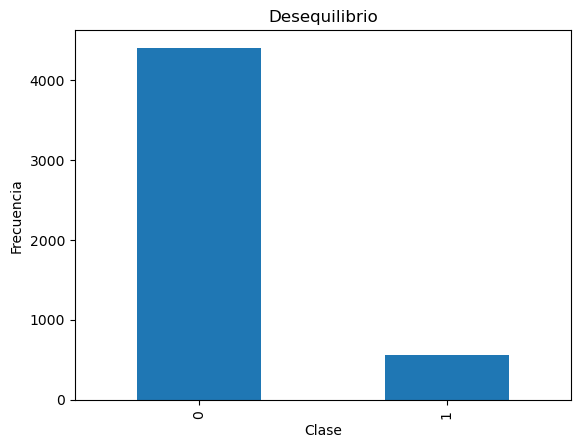

In [27]:
count_classes = pd.value_counts(df['insurance_benefits_received'], sort = True)
count_classes.plot(kind = 'bar')
plt.title("Desequilibrio")
plt.xlabel("Clase")
plt.ylabel("Frecuencia")
plt.show()

Podemos observar mediante una la gráfica el desequilicbrio que tenemos en la clasificación, por lo tanto no esxiste un equilibrio.

In [28]:
def eval_classifier(y_true, y_pred):
    
    f1_score = sklearn.metrics.f1_score(y_true, y_pred)
    print(f'F1: {f1_score:.2f}')
    
# si tienes algún problema con la siguiente línea, reinicia el kernel y ejecuta el cuaderno de nuevo    
    cm = sklearn.metrics.confusion_matrix(y_true, y_pred, normalize='all')
    print('Matriz de confusión')
    print(cm)

In [29]:
# generar la salida de un modelo aleatorio

def rnd_model_predict(P, size, seed=42):

    rng = np.random.default_rng(seed=seed)
    return rng.binomial(n=1, p=P, size=size)

In [30]:
for P in [0, df['insurance_benefits_received'].sum() / len(df), 0.5, 1]:

    print(f'La probabilidad: {P:.2f}')
    y_pred_rnd = (rnd_model_predict(P, len(df['insurance_benefits_received']), seed=42))

    print(y_pred_rnd)

    eval_classifier(df['insurance_benefits_received'], y_pred_rnd)
    
    print()

La probabilidad: 0.00
[0 0 0 ... 0 0 0]
F1: 0.00
Matriz de confusión
[[0.88716502 0.        ]
 [0.11283498 0.        ]]

La probabilidad: 0.11
[0 0 0 ... 0 0 0]
F1: 0.09
Matriz de confusión
[[0.78803143 0.09913359]
 [0.10255894 0.01027604]]

La probabilidad: 0.50
[1 0 1 ... 0 0 0]
F1: 0.18
Matriz de confusión
[[0.44872053 0.43844449]
 [0.05923836 0.05359661]]

La probabilidad: 1.00
[1 1 1 ... 1 1 1]
F1: 0.20
Matriz de confusión
[[0.         0.88716502]
 [0.         0.11283498]]



Se hizo una aprueba realizando las predicciones con los datos del data set, simplemente para ver si funciona el mismo, donde se puede observa que la matriz de confusión   coincide con la información de la probabilidad, por lo que podemos indicar que el diseño de las funciones fueron acertadas.

[Regresar a contenido](#back)

## 5. Tarea 3: Regresión (con regresión lineal) <a id='third_task'></a>

Con `insurance_benefits` como objetivo, evalúa cuál sería la RECM de un modelo de regresión lineal.

Construye tu propia implementación de regresión lineal. Para ello, recuerda cómo está formulada la solución de la tarea de regresión lineal en términos de LA. Comprueba la RECM tanto para los datos originales como para los escalados. ¿Puedes ver alguna diferencia en la RECM con respecto a estos dos casos?

Denotemos- $X$: matriz de características; cada fila es un caso, cada columna es una característica, la primera columna está formada por unidades- $y$ — objetivo (un vector)- $\hat{y}$ — objetivo estimado (un vector)- $w$ — vector de pesos
La tarea de regresión lineal en el lenguaje de las matrices puede formularse así:
$$
y = Xw
$$

El objetivo de entrenamiento es entonces encontrar esa $w$ w que minimice la distancia L2 (ECM) entre $Xw$ y $y$:

$$
\min_w d_2(Xw, y) \quad \text{or} \quad \min_w \text{MSE}(Xw, y)
$$

Parece que hay una solución analítica para lo anteriormente expuesto:
$$
w = (X^T X)^{-1} X^T y
$$

La fórmula anterior puede servir para encontrar los pesos $w$ y estos últimos pueden utilizarse para calcular los valores predichos
$$
\hat{y} = X_{val}w
$$

Divide todos los datos correspondientes a las etapas de entrenamiento/prueba respetando la proporción 70:30. Utiliza la métrica RECM para evaluar el modelo.

In [32]:
class MyLinearRegression:
    
    def __init__(self):
        
        self.weights = None
    
    def fit(self, X, y):
        
        # añadir las unidades
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        self.weights = (np.linalg.inv(X2.T.dot(X2)).dot(X2.T)).dot(y)
        

    def predict(self, X):
        
        # añadir las unidades
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        y_pred = np.dot(X2, self.weights)
        
        return y_pred

In [33]:
def eval_regressor(y_true, y_pred):
    
    rmse = math.sqrt(sklearn.metrics.mean_squared_error(y_true, y_pred))
    print(f'RMSE: {rmse:.2f}')
    
    r2_score = math.sqrt(sklearn.metrics.r2_score(y_true, y_pred))
    print(f'R2: {r2_score:.2f}')       

In [34]:
X = df[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df['insurance_benefits'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

lr = MyLinearRegression()

lr.fit(X_train, y_train)
print(lr.weights)

y_test_pred = lr.predict(X_test)

eval_regressor(y_test, y_test_pred)

[-9.36905527e-01  3.57557908e-02  9.29073442e-03 -2.27875917e-07
 -1.03585105e-02]
RMSE: 0.36
R2: 0.64


In [66]:
X_scaled = df_scaled[['age', 'gender', 'income', 'family_members']].to_numpy()
y_scaled = df_scaled['insurance_benefits'].to_numpy()

X_scaled_train, X_scaled_test, y_scaled_train, y_scaled_test = train_test_split(X_scaled, y_scaled, test_size=0.3, random_state=12345)

lr.fit(X_scaled_train, y_scaled_train)
print(lr.weights)

y_test_scaled_pred = lr.predict(X_scaled_test)

eval_regressor(y_scaled_test, y_test_scaled_pred)


[-0.93690553  2.3241264   0.00929073 -0.01510817 -0.06215106]
RMSE: 0.36
R2: 0.64


En esta ocasión se entrenó nuestro modelo personalizado  y se comprobó con el conjunto de prueba.

[Regresar a contenido](#back)

## 6. Tarea 4: Ofuscar datos <a id='fourth_task'></a>

Lo mejor es ofuscar los datos multiplicando las características numéricas (recuerda que se pueden ver como la matriz $X$) por una matriz invertible $P$. 

$$
X' = X \times P
$$

Trata de hacerlo y comprueba cómo quedarán los valores de las características después de la transformación. Por cierto, la propiedad de invertibilidad es importante aquí, así que asegúrate de que $P$ sea realmente invertible.

Puedes revisar la lección 'Matrices y operaciones matriciales -> Multiplicación de matrices' para recordar la regla de multiplicación de matrices y su implementación con NumPy.

In [35]:
personal_info_column_list = ['gender', 'age', 'income', 'family_members']
df_pn = df[personal_info_column_list]
df_pn

,gender,age,income,family_members
0,1,41,49600.0,1
1,0,46,38000.0,1
2,0,29,21000.0,0
3,0,21,41700.0,2
4,1,28,26100.0,0
...,...,...,...,...
4958,0,28,35700.0,2
4959,0,34,52400.0,1
4960,0,20,33900.0,2
4961,1,22,32700.0,3


In [36]:
Xi = df_pn.to_numpy()
Xi

array([[1.00e+00, 4.10e+01, 4.96e+04, 1.00e+00],
       [0.00e+00, 4.60e+01, 3.80e+04, 1.00e+00],
       [0.00e+00, 2.90e+01, 2.10e+04, 0.00e+00],
       ...,
       [0.00e+00, 2.00e+01, 3.39e+04, 2.00e+00],
       [1.00e+00, 2.20e+01, 3.27e+04, 3.00e+00],
       [1.00e+00, 2.80e+01, 4.06e+04, 1.00e+00]])

Generar una matriz aleatoria $P$.

In [37]:
rng = np.random.default_rng(seed=42)
P = rng.random(size=(Xi.shape[1], Xi.shape[1]))
P

array([[0.77395605, 0.43887844, 0.85859792, 0.69736803],
       [0.09417735, 0.97562235, 0.7611397 , 0.78606431],
       [0.12811363, 0.45038594, 0.37079802, 0.92676499],
       [0.64386512, 0.82276161, 0.4434142 , 0.22723872]])

Comprobar que la matriz P sea invertible

In [38]:
P_inv=np.linalg.inv(P)
P_inv

array([[ 0.41467992, -1.43783972,  0.62798546,  1.14001268],
       [-1.06101789,  0.44219337,  0.1329549 ,  1.18425933],
       [ 1.42362442,  1.60461607, -2.0553823 , -1.53699695],
       [-0.11128575, -0.65813802,  1.74995517, -0.11816316]])

Utiliando la función np.linalg.inv() podemos determinar si una matriz es ivertible, ya que si no lo es esta arroja un error, en este caso si dio otra matriz que es la inversa de P.

¿Puedes adivinar la edad o los ingresos de los clientes después de la transformación?

En este caso, no es posible calcular los datos como edades o ingeresos, ya que con los datos ofuscados, no es posible saber qued atos son que despues de la transformación, para esto necesitamos aplicar la operación inversa para obtener los datos originales

In [39]:
np.linalg.inv(P_inv)

array([[0.77395605, 0.43887844, 0.85859792, 0.69736803],
       [0.09417735, 0.97562235, 0.7611397 , 0.78606431],
       [0.12811363, 0.45038594, 0.37079802, 0.92676499],
       [0.64386512, 0.82276161, 0.4434142 , 0.22723872]])

¿Puedes recuperar los datos originales de $X'$ si conoces $P$? Intenta comprobarlo a través de los cálculos moviendo $P$ del lado derecho de la fórmula anterior al izquierdo. En este caso las reglas de la multiplicación matricial son realmente útiles

In [40]:
# Calculamos primerolos valores ofuscados de X'

Xn= X@P
Xn

array([[ 6386.90642117, 22358.93491961, 18427.98907055, 45997.14883911],
       [ 4904.56388502, 17135.67680987, 14130.26383935, 35249.37574431],
       [ 2712.83101159,  9470.83217056,  7811.65784856, 19482.28843866],
       ...,
       [ 4359.81899891, 15278.50638668, 12588.11180828, 31431.73495999],
       [ 4208.36859427, 14740.71940205, 12146.07592894, 30322.02501246],
       [ 5223.82229845, 18299.75605884, 15079.6450795 , 37647.19815509]])

In [41]:
# Se comprueba la recuperación de los datos de X utilizando la inversa de P

X_rec=Xn@P_inv
X_rec

array([[ 4.1000000e+01,  1.0000000e+00,  4.9600000e+04,  1.0000000e+00],
       [ 4.6000000e+01, -1.8189894e-12,  3.8000000e+04,  1.0000000e+00],
       [ 2.9000000e+01, -1.8189894e-12,  2.1000000e+04,  0.0000000e+00],
       ...,
       [ 2.0000000e+01,  0.0000000e+00,  3.3900000e+04,  2.0000000e+00],
       [ 2.2000000e+01,  1.0000000e+00,  3.2700000e+04,  3.0000000e+00],
       [ 2.8000000e+01,  1.0000000e+00,  4.0600000e+04,  1.0000000e+00]])

In [42]:
Xi

array([[1.00e+00, 4.10e+01, 4.96e+04, 1.00e+00],
       [0.00e+00, 4.60e+01, 3.80e+04, 1.00e+00],
       [0.00e+00, 2.90e+01, 2.10e+04, 0.00e+00],
       ...,
       [0.00e+00, 2.00e+01, 3.39e+04, 2.00e+00],
       [1.00e+00, 2.20e+01, 3.27e+04, 3.00e+00],
       [1.00e+00, 2.80e+01, 4.06e+04, 1.00e+00]])

Observando los valores de $X$ originales y de $Xrec$ que son los datos recuperados, podemos observar que son iguales, por lo tanto contestando a la pregunta si es posible recuperar los datos originales de $Xn$ si conoces $P$

Muestra los tres casos para algunos clientes- Datos originales
- El que está transformado- El que está invertido (recuperado)

In [43]:
Xi

array([[1.00e+00, 4.10e+01, 4.96e+04, 1.00e+00],
       [0.00e+00, 4.60e+01, 3.80e+04, 1.00e+00],
       [0.00e+00, 2.90e+01, 2.10e+04, 0.00e+00],
       ...,
       [0.00e+00, 2.00e+01, 3.39e+04, 2.00e+00],
       [1.00e+00, 2.20e+01, 3.27e+04, 3.00e+00],
       [1.00e+00, 2.80e+01, 4.06e+04, 1.00e+00]])

In [44]:
Xn

array([[ 6386.90642117, 22358.93491961, 18427.98907055, 45997.14883911],
       [ 4904.56388502, 17135.67680987, 14130.26383935, 35249.37574431],
       [ 2712.83101159,  9470.83217056,  7811.65784856, 19482.28843866],
       ...,
       [ 4359.81899891, 15278.50638668, 12588.11180828, 31431.73495999],
       [ 4208.36859427, 14740.71940205, 12146.07592894, 30322.02501246],
       [ 5223.82229845, 18299.75605884, 15079.6450795 , 37647.19815509]])

In [45]:
X_rec

array([[ 4.1000000e+01,  1.0000000e+00,  4.9600000e+04,  1.0000000e+00],
       [ 4.6000000e+01, -1.8189894e-12,  3.8000000e+04,  1.0000000e+00],
       [ 2.9000000e+01, -1.8189894e-12,  2.1000000e+04,  0.0000000e+00],
       ...,
       [ 2.0000000e+01,  0.0000000e+00,  3.3900000e+04,  2.0000000e+00],
       [ 2.2000000e+01,  1.0000000e+00,  3.2700000e+04,  3.0000000e+00],
       [ 2.8000000e+01,  1.0000000e+00,  4.0600000e+04,  1.0000000e+00]])

Seguramente puedes ver que algunos valores no son exactamente iguales a los de los datos originales. ¿Cuál podría ser la razón de ello?

Esto puede ser debido a los calculos, sin embargo, a pesar de que no son exactamente iguales, son semejantes, ya que los valores que varian, los originales son 0 y los recuperados son datos con exponenciales a la -12, prácticamente es 0, por lo que el error es sumamente pequeño.

## Prueba de que la ofuscación de datos puede funcionar con regresión lineal

En este proyecto la tarea de regresión se ha resuelto con la regresión lineal. Tu siguiente tarea es demostrar _analytically_ que el método de ofuscación no afectará a la regresión lineal en términos de valores predichos, es decir, que sus valores seguirán siendo los mismos. ¿Lo puedes creer? Pues no hace falta que lo creas, ¡tienes que que demostrarlo!

Entonces, los datos están ofuscados y ahora tenemos $X \times P$ en lugar de tener solo $X$. En consecuencia, hay otros pesos $w_P$ como
$$
w = (X^T X)^{-1} X^T y \quad \Rightarrow \quad w_P = [(XP)^T XP]^{-1} (XP)^T y
$$

¿Cómo se relacionarían $w$ y $w_P$ si simplificáramos la fórmula de $w_P$ anterior? 

¿Cuáles serían los valores predichos con $w_P$? 

¿Qué significa esto para la calidad de la regresión lineal si esta se mide mediante la RECM?
Revisa el Apéndice B Propiedades de las matrices al final del cuaderno. ¡Allí encontrarás fórmulas muy útiles!

No es necesario escribir código en esta sección, basta con una explicación analítica.

**Respuesta**

Como pudimos observar, $X$ y $X_n$ tienen una relación, lo cual depende completamente de que P sea inversa, ya que partiendo de cualquiera de las dos variables se puede obtener la otra mediante la ecuación:

$$
Xn = X \times P
$$

Como podemos observar en la ecuación, ambas variables se pueden despejar y poder calcularlas, por lo tanto si partimos de:

$$
w = (X^T X)^{-1} X^T y 
$$

Si consideramos que 

$$
X_n=X\times P 
$$

para obtener $w_P$, susituimos los valores de 

$$
w_P = [(XP)^T XP]^{-1} (XP)^T y
$$

Con base en lo que hemos estado revisando, los valores de $X$ y de $Xn$ no son los mismos tienen valores diferentes, debido a la transformación y esto lo podemos observar en el código anterior, sin embargo, se puede regresar de $Xn$ a los valores originales de $X$ , por lo que los valores predichos con $w_p$  serán diferentes a los que se obtengan con $w$, sin embargo, si partieramos de datos de $w_p$ es posible poder obtener los valores de $w$ mediante la formula para recuperar los datos originales, gracias a las propiedades de las matrices siempre y cuando P sea inversa.

En cuestión de la calidad de la regresión lineal, se considera que los errores serían semejeantes, aunque se trate de datos diferentes si se trrabaja con $w$ o $w_p$, ya que van a seguir un patrón, puede que no sea el mismo pero elerror arrojado de REMC será semejante.

**Prueba analítica**

$$
w = (X^T X)^{-1} X^T y \quad \Rightarrow \quad w_P = [(XP)^T XP]^{-1} (XP)^T y
$$

Considerando que cuando se calcula $w_p$ se trabaja con $Xn$, tenemos que 

$$
w_p = ((Xn)^T Xn)^{-1} (Xn)^T y
$$

Considerando que $Xn=XP$ tenemos que:

$$
w_p = ((Xn)^T)^{-1} (Xn)^{-1} (Xn)^T y
$$

$$
 = (X^T)^{-1} (P^T)^{-1} (X)^{-1} (P)^{-1} (X)^T (P)^T y
$$

$$
 = ((X^T) (P^T))^{-1} ((X) (P))^{-1} ((X)(P))^T y
$$

$$
 = [((X) (P))^T (X) (P)]^{-1} ((X)(P))^T y
$$

Simplificando llegamos a la siguiente ecuación:

$$
w_p = ((XP)^T XP)^{-1} (XP)^T y
$$

## Prueba de regresión lineal con ofuscación de datos

Ahora, probemos que la regresión lineal pueda funcionar, en términos computacionales, con la transformación de ofuscación elegida.
Construye un procedimiento o una clase que ejecute la regresión lineal opcionalmente con la ofuscación. Puedes usar una implementación de regresión lineal de scikit-learn o tu propia implementación.
Ejecuta la regresión lineal para los datos originales y los ofuscados, compara los valores predichos y los valores de las métricas RMSE y $R^2$. ¿Hay alguna diferencia?

**Procedimiento**

- Crea una matriz cuadrada $P$ de números aleatorios.- Comprueba que sea invertible. Si no lo es, repite el primer paso hasta obtener una matriz invertible.- <¡ tu comentario aquí !>
- Utiliza $XP$ como la nueva matriz de características

In [46]:
# Se crea una matriz cuadrada P de números aleatorios

rng_test = np.random.default_rng(seed=42)
P_test = rng_test.random(size=(X.shape[1], X.shape[1]))
P_test

array([[0.77395605, 0.43887844, 0.85859792, 0.69736803],
       [0.09417735, 0.97562235, 0.7611397 , 0.78606431],
       [0.12811363, 0.45038594, 0.37079802, 0.92676499],
       [0.64386512, 0.82276161, 0.4434142 , 0.22723872]])

In [47]:
# Se comprueba que sea inversible

P_test_inv = np.linalg.inv(P_test)
P_test_inv

array([[ 0.41467992, -1.43783972,  0.62798546,  1.14001268],
       [-1.06101789,  0.44219337,  0.1329549 ,  1.18425933],
       [ 1.42362442,  1.60461607, -2.0553823 , -1.53699695],
       [-0.11128575, -0.65813802,  1.74995517, -0.11816316]])

Se puede observar que la matriz cuadrada P_test es inversible, ya que no nos arrojó ningún tipo de  error.

In [52]:
# Se calcula la matriz ofuscada Xn como la nueva matriz de características.

Xn_p = X@P_test
Xn_p

array([[ 6386.90642117, 22358.93491961, 18427.98907055, 45997.14883911],
       [ 4904.56388502, 17135.67680987, 14130.26383935, 35249.37574431],
       [ 2712.83101159,  9470.83217056,  7811.65784856, 19482.28843866],
       ...,
       [ 4359.81899891, 15278.50638668, 12588.11180828, 31431.73495999],
       [ 4208.36859427, 14740.71940205, 12146.07592894, 30322.02501246],
       [ 5223.82229845, 18299.75605884, 15079.6450795 , 37647.19815509]])

In [49]:
y_pred_1= lr.predict(X_test)
y_pred_1

array([-0.09955854, -0.32725466, -0.00796799, ...,  0.26969911,
        0.43467863, -0.32340356])

In [51]:
eval_regressor(y_test, y_pred_1)

RMSE: 0.36
R2: 0.64


In [58]:
# Es necesario entrenar el modelo con los datos ofuscados

Xn_train, Xn_test, y_train, y_test = train_test_split(Xn_p, y, test_size=0.3, random_state=12345)

lr.fit(Xn_train, y_train)

y_pred_2 = lr.predict(Xn_test)

y_pred_2

array([-0.09955848, -0.32725463, -0.00796793, ...,  0.26969913,
        0.43467863, -0.32340351])

In [62]:
eval_regressor(y_test, y_pred_2)

RMSE: 0.36
R2: 0.64


[Regresar a contenido](#back)

# Conclusiones <a id='end'></a> 

#### Tarea 1 ####

Se diseñó y desarrolló un procedimiento que devuelva los k vecinos más cercanos (objetos) para un objeto dado basándose en la distancia entre los objetos, en donde podemos observar que al correr el algoritmo con datos sin escalar las distancias son mayores que cuando los datos se escalan, por lo tanto se puede determinar que se obtienen mejores resultados con los datos escalados. Mientras que entre la distancia euclidiana y en distancia Manhattan, existe una variación relativamente pequeña, siendo muy semejantes, dicho comportamiento se encuentra tanto en los datos escalados como en los que no lo están.

Mediante este proceso podemos encontrar clientes similares a los clientes de interés.

#### Tarea 2 ####

Se construyó un modelo donde se clasificaron los datos con base en la cercanía de os vecinos y se evalua su calidad mediante la metrica F1, tanto en datos escalados como en originales. para lo que se construyó una modelo dummy (aleatorio), el cual funcionó para cuatro valores de probabilidad previamente establecidos.

#### Tarea 3 ####

Se construyó una implementación de regresión lineal, la cual se aplicó a los datos originales y a los escalados, en donde en ambos casos, se obtuvo los mismos resultados, tanto de RECM y de R2, observando que no hay una diferencia entre los RECM independientemente si se trabaja con los datos originales o si se trabajó con los datos escalados.

#### Tarea 4 ####

Mediante la ofuscación de datos, en donde aprovechando las propiedades de matrices, se multiplicó con un amatriz cuadrada que tenía que ser invertible,  logrando transformar los datos, lo cual dificultaría la recuperaciónd e los datos, para proteger los datos personales de los clientes sin romper el modelo de la tarea y la calidad no se vea afectada. por lo que al evaluar los datos ofuscados y los datos originales, se puede observar que las métricas REMC y R2 no se ven afectadas, de esta forma se cumple con el objetivo de la actividad.

[Regresar a contenido](#back)